# Assignment
Using the dataset for the risk of heart attack with class imbalance:

Create a logistic regression model and measure the performance of it.


In [55]:
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('E:/user/Notebooks/data/cleveland-0_vs_4.dat',skiprows = 18,error_bad_lines=False)
df.columns =['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
172,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
173,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
174,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive


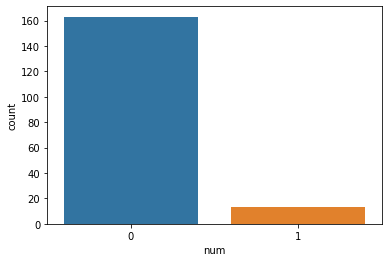

In [56]:
df["num"] = pd.get_dummies(df.num, drop_first=True)
sns.countplot(df.num)

In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [58]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median()) 
for n, c in df.items():
        fix_missing(df, c, n)

In [59]:
df.ca = df.ca.replace('<null>',1.5)
df.thal = df.thal.replace('<null>',5.0)

In [64]:
df.num.value_counts()       

0    163
1     13
Name: num, dtype: int64

In [61]:
y = df['num']
X = df.drop('num', axis=1)


create_model(X,y)

Accuracy : 0.9444444444444444

Train Dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.70      0.82        10

    accuracy                           0.98       140
   macro avg       0.99      0.85      0.91       140
weighted avg       0.98      0.98      0.98       140

Test Dataset
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36



By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [63]:
from sklearn.utils import resample
normal_shopping = df[df.num == 0]
fraudulent_shopping = df[df.num == 1]

fraudulent_shopping_upsampled = resample(fraudulent_shopping,
                                         replace = True,
                                         n_samples = len(normal_shopping),
                                         random_state = 111)

upsampled_df = pd.concat([normal_shopping, fraudulent_shopping_upsampled])
upsampled_df.num.value_counts()

1    163
0    163
Name: num, dtype: int64

In [66]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       130
           1       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [67]:
normal_shopping = df[df.num == 0]
fraudulent_shopping = df[df.num == 1]

fraudulent_shopping_downsampled = resample(normal_shopping,
                                         replace = True,
                                         n_samples = len(fraudulent_shopping),
                                         random_state = 111)

downsampled_df = pd.concat([fraudulent_shopping, fraudulent_shopping_downsampled])
downsampled_df.num.value_counts()

1    13
0    13
Name: num, dtype: int64

In [69]:
X = downsampled_df.drop('num', axis=1)
y = downsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [73]:
from imblearn.over_sampling import SMOTE

y = df.num
X = df.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [74]:
create_model(X_smote, y_smote)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       130
           1       0.96      0.99      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



In [76]:
from imblearn.over_sampling import ADASYN
y = df.num
X = df.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [77]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9545454545454546

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       130
           1       0.96      1.00      0.98       132

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.97      0.94      0.95        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



upsampled and down sampled gave best performance